In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from calibration import Calibration

In [4]:
cali = Calibration("data/calibration_images/*.png", 6, 9)
cali.calibrate()

data/calibration_images/left*.png
data/calibration_images/right*.png


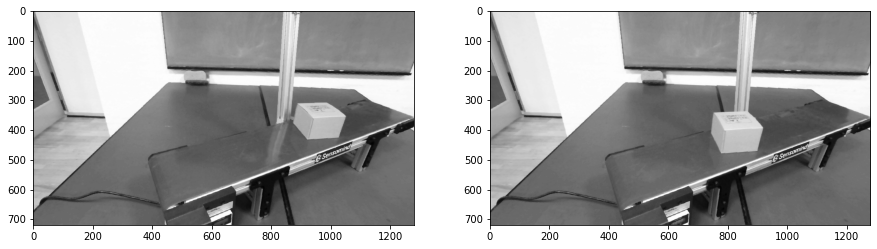

In [14]:
############# box images #############
img_left1 = cv2.imread("data/conveyorImages/1585434285_381072044_Left.png")
img_left2 = cv2.imread("data/conveyorImages/1585434286_376712084_Left.png")
img_left3 = cv2.imread("data/conveyorImages/1585434287_040472031_Left.png")

dst_left1 = cali.left_remap(img_left1)
dst_left2 = cali.left_remap(img_left2)
dst_left3 = cali.left_remap(img_left3)
gray1 = cv2.cvtColor(dst_left1,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(dst_left2,cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(dst_left3,cv2.COLOR_BGR2GRAY)


############# calibration images #############
# img_left1 = cv2.imread("data/calibration_images/left-0001.png")
# img_left2 = cv2.imread("data/calibration_images/left-0002.png")
# img_right1 = cv2.imread("data/calibration_images/right-0001.png")
# img_right2 = cv2.imread("data/calibration_images/right-0002.png")
    

# dst_left1 = cali.left_remap(img_left1)
# dst_right1 = cali.left_remap(img_right1)
# gray1 = cv2.cvtColor(dst_left1,cv2.COLOR_BGR2GRAY)
# gray2 = cv2.cvtColor(dst_right1,cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1,2,figsize=(15,10))
ax[0].imshow(gray1,cmap='gray')
ax[1].imshow(gray2,cmap='gray')

